In [ ]:
#Data_segment_data.xlsx

In [6]:
import pandas as pd
import numpy as np
from fbprophet import Prophet 
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

In [7]:
from scipy.special import inv_boxcox

In [8]:
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")# for pretty graphs
df = pd.read_excel('Data_segment_data.xlsx')
df.head()

,Day Index,Sessions
0,2014-09-25,1
1,2014-09-26,4
2,2014-09-27,8
3,2014-09-28,42
4,2014-09-29,233


In [9]:
#rename the columns 
df.columns = ['ds','y']
df.head()

,ds,y
0,2014-09-25,1
1,2014-09-26,4
2,2014-09-27,8
3,2014-09-28,42
4,2014-09-29,233


In [10]:
df.shape

(891, 2)

In [ ]:
df.loc[(df['Sessions'] > 5000), 'Sessions'] = np.nan
df.set_index('Day Index').plot();

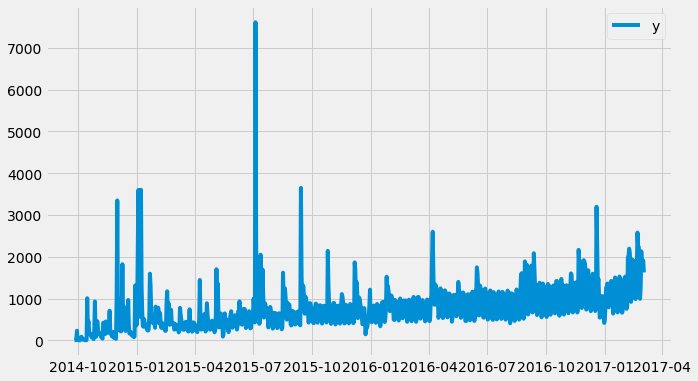

In [8]:
plt.figure(figsize=(10,6))
plt.plot(df.set_index('ds'))
plt.legend(['y'])

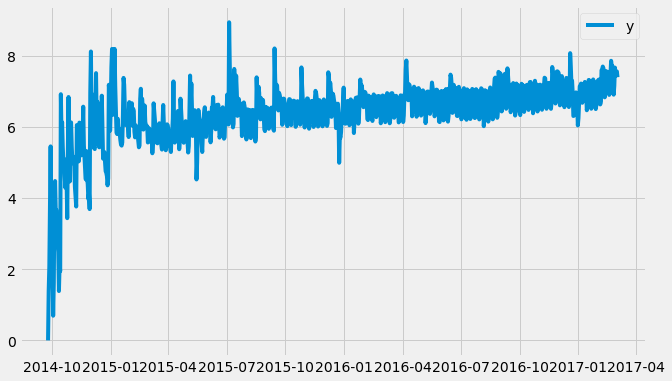

In [9]:
df['y'] = np.log(df['y'])
plt.figure(figsize=(10,6))
plt.plot(df.set_index('ds'))
plt.legend(['y'])

In [11]:
m=Prophet(daily_seasonality=True)
m.fit(df)

C:\Users\t\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [14]:
future= m.make_future_dataframe(periods=30)
forecast= m.predict(future)
forecast.tail().T

,916,917,918,919,920
ds,2017-03-29 00:00:00,2017-03-30 00:00:00,2017-03-31 00:00:00,2017-04-01 00:00:00,2017-04-02 00:00:00
trend,4.22633,4.22747,4.22862,4.22976,4.2309
yhat_lower,6.60539,6.57194,6.41797,5.91422,6.07071
yhat_upper,7.83738,7.80031,7.6687,7.13475,7.32723
trend_lower,4.2142,4.21393,4.21422,4.21434,4.21472
trend_upper,4.23746,4.23955,4.24203,4.24502,4.24738
additive_terms,2.99029,2.9831,2.80527,2.28898,2.45228
additive_terms_lower,2.99029,2.9831,2.80527,2.28898,2.45228
additive_terms_upper,2.99029,2.9831,2.80527,2.28898,2.45228
daily,2.93261,2.93261,2.93261,2.93261,2.93261


In [15]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2014-09-25,3.649485,3.005663,4.267634
1,2014-09-26,3.457486,2.826493,4.069803
2,2014-09-27,2.929245,2.319593,3.556472
3,2014-09-28,3.083403,2.456998,3.695125
4,2014-09-29,3.729007,3.091204,4.360047
5,2014-09-30,3.688414,3.085656,4.282231
6,2014-10-01,3.653817,3.024648,4.307303
7,2014-10-02,3.653084,3.034116,4.277128
8,2014-10-03,3.487041,2.865515,4.138348
9,2014-10-04,2.988125,2.347728,3.613751


In [17]:
np.exp(forecast[['yhat', 'yhat_lower', 'yhat_upper']].tail(12))

,yhat,yhat_lower,yhat_upper
909,1292.671126,693.196030,2381.115852
910,1285.200961,706.846541,2403.282878
911,1077.819505,573.883625,2004.842009
912,644.565945,321.692029,1141.801212
913,760.682336,401.577879,1460.396194
914,1462.591246,762.693701,2868.152632
915,1410.290764,746.076948,2657.190752
916,1361.878196,739.069005,2533.564527
917,1353.673046,714.755188,2441.348924
918,1134.435293,612.755961,2140.301428


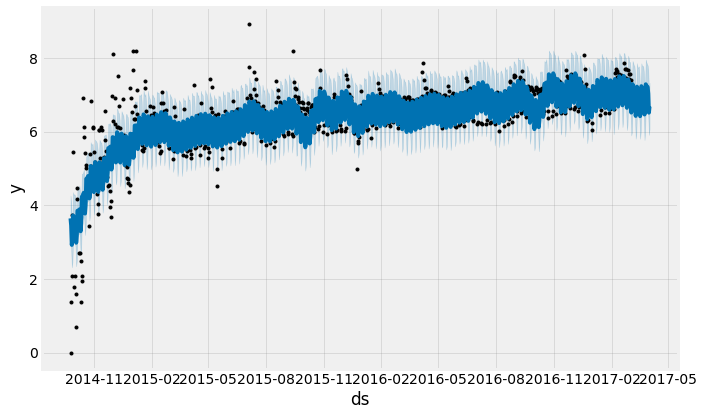

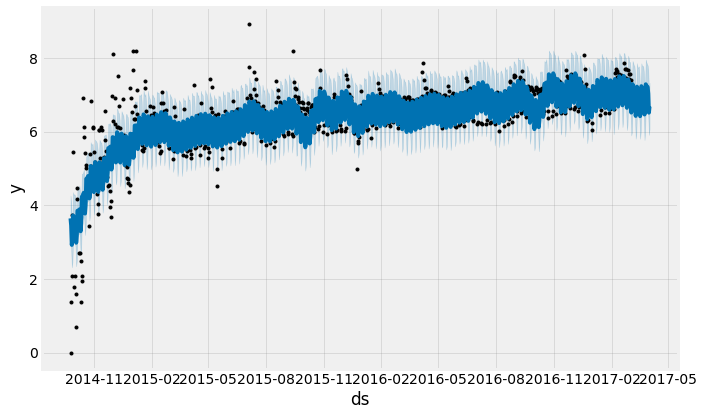

In [18]:
m.plot(forecast)

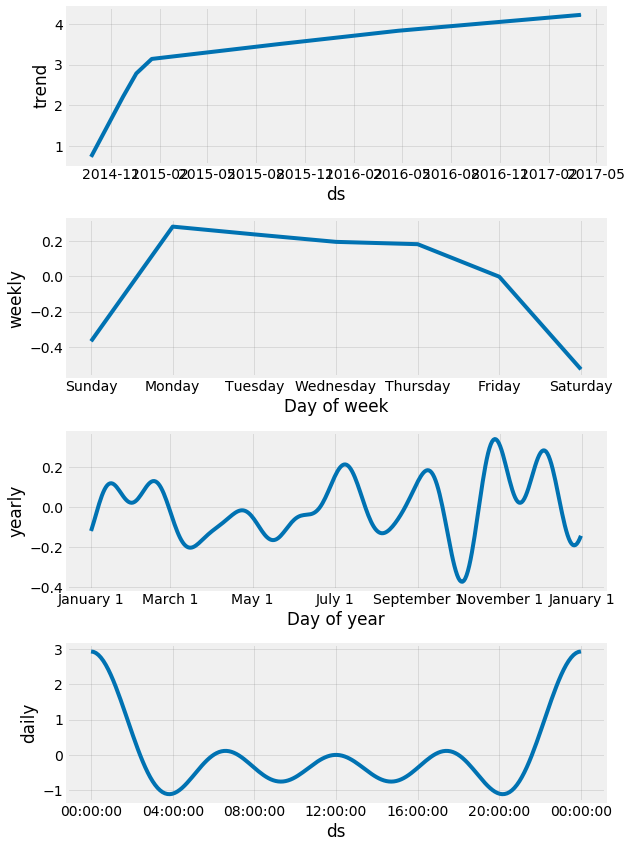

In [20]:
m.plot_components(forecast);

In [27]:
cross_validation_results = cross_validation(m, initial='210 days', period='15 days', horizon='70 days')
cross_validation_results



INFO:fbprophet:Making 41 forecasts with cutoffs between 2015-05-03 00:00:00 and 2016-12-23 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2015-05-04,5.955866,5.000720,6.922129,6.395262,2015-05-03
1,2015-05-05,5.683649,4.713531,6.632909,7.440734,2015-05-03
2,2015-05-06,5.663869,4.731211,6.620841,6.643790,2015-05-03
3,2015-05-07,5.702259,4.764217,6.707263,7.215975,2015-05-03
4,2015-05-08,5.555467,4.595754,6.507674,6.523562,2015-05-03
5,2015-05-09,5.228918,4.294319,6.197381,5.743003,2015-05-03
6,2015-05-10,5.533417,4.600665,6.527772,5.908083,2015-05-03
7,2015-05-11,6.239252,5.203369,7.212893,6.396930,2015-05-03
8,2015-05-12,6.097357,5.061659,7.067624,6.467699,2015-05-03
9,2015-05-13,6.212730,5.274237,7.195149,6.234411,2015-05-03


In [25]:
performance_metrics_results = performance_metrics(cross_validation_results)
performance_metrics_results

,horizon,mse,rmse,mae,mape,coverage
0,7 days,0.334604,0.578450,0.413438,0.062141,0.867596
1,8 days,0.378425,0.615163,0.437652,0.066088,0.846690
2,9 days,0.424307,0.651389,0.464146,0.070369,0.825784
3,10 days,0.472499,0.687386,0.495888,0.075949,0.804878
4,11 days,0.516889,0.718950,0.518520,0.079581,0.780488
5,12 days,0.595809,0.771887,0.551417,0.085125,0.763066
6,13 days,0.686863,0.828772,0.589040,0.091003,0.738676
7,14 days,0.764153,0.874158,0.620930,0.095793,0.724739
8,15 days,0.849430,0.921645,0.652270,0.100577,0.714286
9,16 days,0.929999,0.964365,0.677446,0.104394,0.700348
